# mob() in R

## Manual
https://cran.r-project.org/web/packages/party/vignettes/MOB.pdf

## Regression

In [31]:
library("party")
data("BostonHousing", package = "mlbench")
head(BostonHousing)
BostonHousing$lstat <- log(BostonHousing$lstat)
BostonHousing$rm <- BostonHousing$rm^2
BostonHousing$chas <- factor(BostonHousing$chas, levels = 0:1, labels = c("no", "yes"))
BostonHousing$rad <- factor(BostonHousing$rad, ordered = TRUE)
head(BostonHousing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,no,0.538,43.23063,65.2,4.0900,1,296,15.3,396.90,1.605430,24.0
0.02731,0,7.07,no,0.469,41.22924,78.9,4.9671,2,242,17.8,396.90,2.212660,21.6
0.02729,0,7.07,no,0.469,51.62422,61.1,4.9671,2,242,17.8,392.83,1.393766,34.7
0.03237,0,2.18,no,0.458,48.97200,45.8,6.0622,3,222,18.7,394.63,1.078410,33.4
0.06905,0,2.18,no,0.458,51.07961,54.2,6.0622,3,222,18.7,396.90,1.673351,36.2
0.02985,0,2.18,no,0.458,41.34490,58.7,6.0622,3,222,18.7,394.12,1.650580,28.7


In [29]:
ctrl <- mob_control(alpha = 0.05, bonferroni = TRUE, minsplit = 40, objfun = deviance, verbose = TRUE)
fmBH <- mob(medv ~ lstat + rm | zn + indus + chas + nox + age + dis + rad + tax + crim, 
            data = BostonHousing, 
            control = ctrl, 
            model = linearModel)
fmBH


-------------------------------------------
Fluctuation tests of splitting variables:
                    zn        indus         chas          nox          age
statistic 3.363356e+01 6.532322e+01 2.275635e+01 8.136281e+01 3.675850e+01
p.value   8.378074e-05 1.115674e-11 4.085225e-04 2.855289e-15 1.852199e-05
                   dis          rad          tax         crim
statistic 6.848533e+01 1.153641e+02 9.068440e+01 8.655065e+01
p.value   2.204103e-12 5.799011e-13 2.238156e-17 1.927921e-16

Best splitting variable: tax
Perform split? yes
-------------------------------------------

Node properties:
tax <= 432; criterion = 1, statistic = 115.364

-------------------------------------------
Fluctuation tests of splitting variables:
                    zn       indus      chas          nox        age
statistic 27.785009791 21.33293464 8.0272421 23.774323202 11.9204284
p.value    0.001222416  0.02333398 0.3420698  0.007788054  0.6959564
                   dis          rad          tax  

1) tax <= 432; criterion = 1, statistic = 115.364
  2) tax <= 265; criterion = 1, statistic = 50.482
    3) indus <= 3.97; criterion = 0.991, statistic = 19.684
      4)*  weights = 45 
Terminal node model
Linear model with coefficients:
(Intercept)        lstat           rm  
     7.7901      -3.3299       0.6745  

    3) indus > 3.97
      5)*  weights = 47 
Terminal node model
Linear model with coefficients:
(Intercept)        lstat           rm  
      5.277       -2.724        0.615  

  2) tax > 265
    6) crim <= 0.79041; criterion = 1, statistic = 38.471
      7) age <= 42.6; criterion = 0.995, statistic = 43.747
        8)*  weights = 81 
Terminal node model
Linear model with coefficients:
(Intercept)        lstat           rm  
    -8.8776       0.8048       0.8002  

      7) age > 42.6
        9) rad <= 4; criterion = 0.992, statistic = 47
          10)*  weights = 51 
Terminal node model
Linear model with coefficients:
(Intercept)        lstat           rm  
    -8.4765  

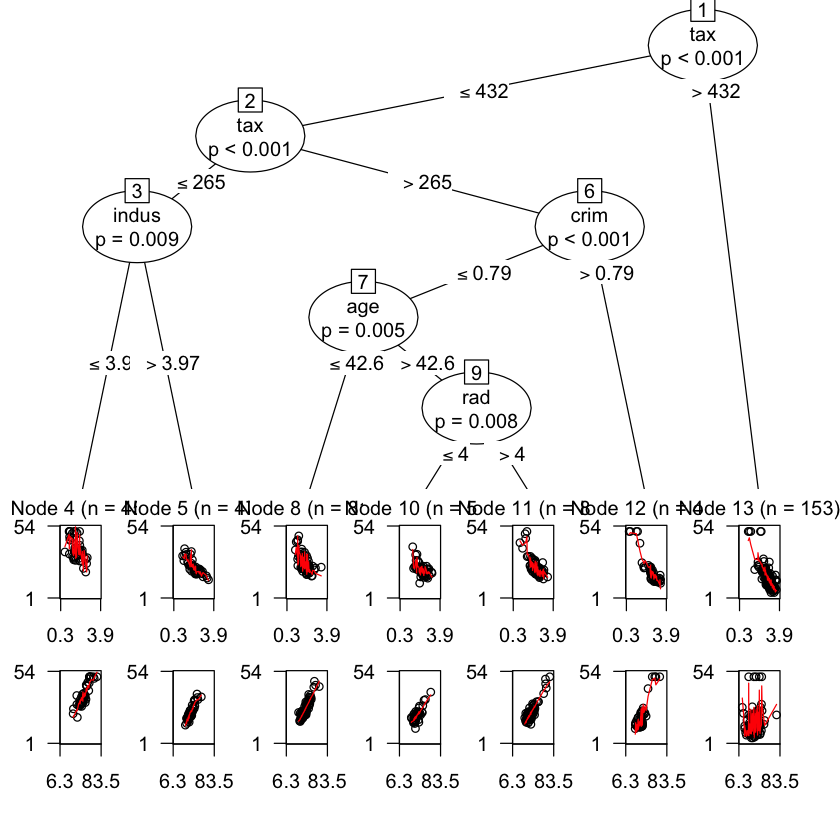

In [10]:
plot(fmBH)

In [11]:
coef(fmBH)

,(Intercept),lstat,rm
4,7.790056,-3.3299136,0.6745337
5,5.277143,-2.7241480,0.6150054
8,-8.877568,0.8047961,0.8002127
10,-8.476473,2.0154069,0.6492267
11,2.236117,-1.5502179,0.6087220
12,27.240520,-9.0104410,0.4552168
13,68.297087,-16.3540061,-0.1477939


In [12]:
summary(fmBH, node = 7)


Call:
NULL

Weighted Residuals:
   Min     1Q Median     3Q    Max 
-9.426  0.000  0.000  0.000  9.969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.13603    2.66784   0.426   0.6707    
lstat       -1.40475    0.62184  -2.259   0.0249 *  
rm           0.63503    0.03689  17.215   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.902 on 213 degrees of freedom
Multiple R-squared:  0.7831,	Adjusted R-squared:  0.7811 
F-statistic: 384.6 on 2 and 213 DF,  p-value: < 2.2e-16


In [13]:
sctest(fmBH, node = 7)

,zn,indus,chas,nox,age,dis,rad,tax,crim
statistic,12.7292159,16.8426118,14.07158046,13.7742679,23.82212719,7.5959785,43.74674788,15.8528625,11.9706961
p.value,0.4787166,0.1119256,0.02528389,0.3477086,0.00530032,0.9910346,0.02269041,0.1652516,0.5855119


In [16]:
mean(residuals(fmBH)^2)
logLik(fmBH)

[1] 11.642

'log Lik.' -1294.948 (df=34)

## Classification

In [25]:
data("PimaIndiansDiabetes2", package = "mlbench")
PimaIndiansDiabetes <- na.omit(PimaIndiansDiabetes2[,-c(4, 5)])
head(PimaIndiansDiabetes)

pregnant,glucose,pressure,mass,pedigree,age,diabetes
6,148,72,33.6,0.627,50,pos
1,85,66,26.6,0.351,31,neg
8,183,64,23.3,0.672,32,pos
1,89,66,28.1,0.167,21,neg
0,137,40,43.1,2.288,33,pos
5,116,74,25.6,0.201,30,neg


,(Intercept),glucose
2,-10.999447,0.06456780
4,-6.573067,0.04504490
5,-3.318569,0.02748038


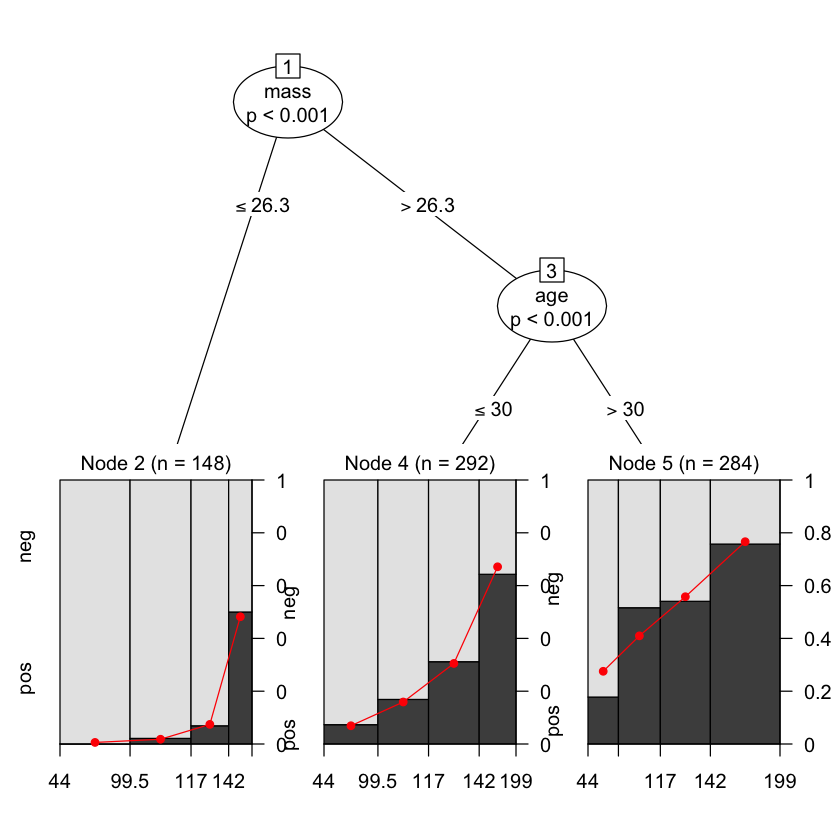

In [30]:
fmPID <- mob(diabetes ~ glucose | pregnant + pressure + mass + pedigree + age, 
             data = PimaIndiansDiabetes, 
             model = glinearModel, 
             family = binomial())
plot(fmPID)
coef(fmPID)
# exp(coef(fmPID)[,2])